In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

In [ ]:
gender = pd.read_csv("../data/raw/titanic/gender_submission.csv")
gender.info()
gender.head()

In [2]:
train = pd.read_csv("../data/raw/titanic/train.csv")
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv("../data/raw/titanic/test.csv") # dataset used by Kaggle to evaluate our model performance egal to everyone
test.info()
test.head()

In [3]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [4]:
train["Pclass"].unique()

array([3, 1, 2])

In [5]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

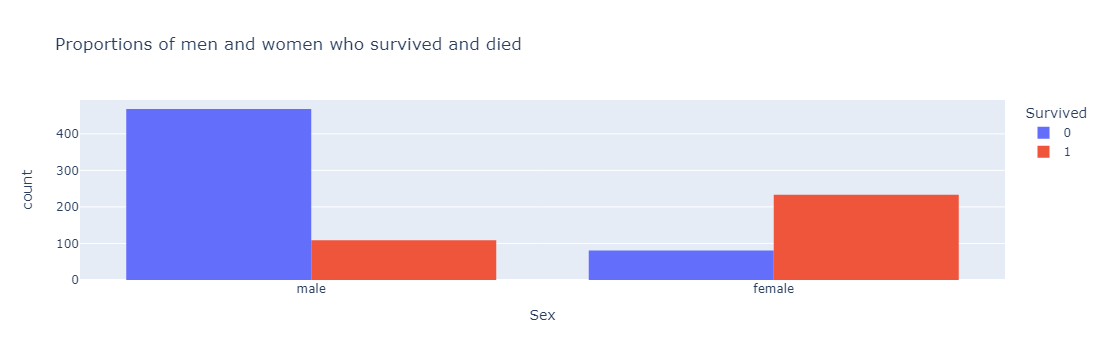

In [7]:
fig = px.histogram(train, x = "Sex", color = "Survived", barmode = "group", title = "Proportions of men and women who survived and died")
fig.show()

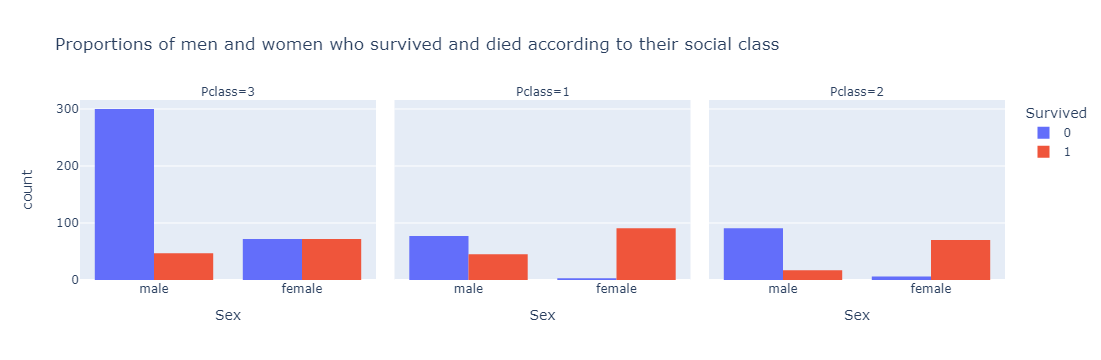

In [9]:
fig = px.histogram(train, x = "Sex", color = "Survived", barmode = "group", facet_col = "Pclass",
                  title = "Proportions of men and women who survived and died according to their social class")
fig.show()

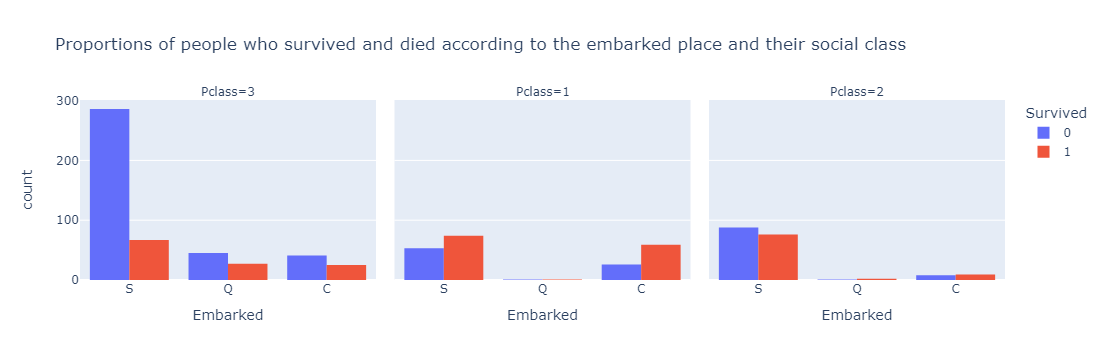

In [11]:
fig = px.histogram(train, x = "Embarked", color = "Survived", barmode = "group", facet_col = "Pclass",
                  title = "Proportions of people who survived and died according to the embarked place and their social class")
fig.show()

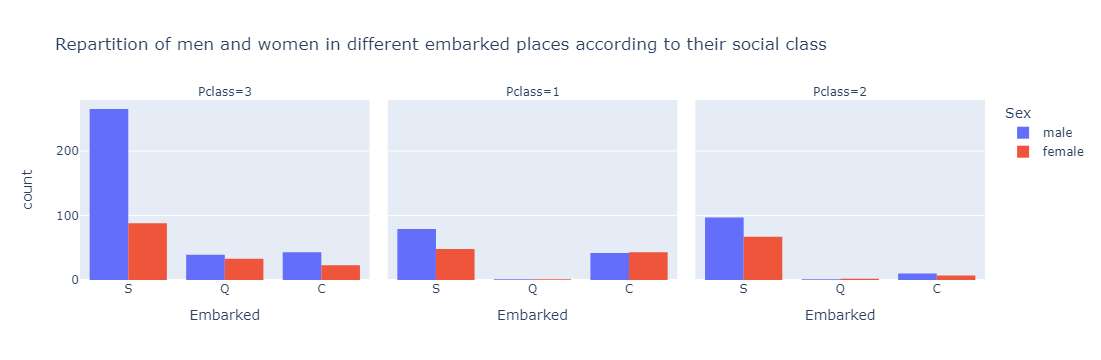

In [13]:
fig = px.histogram(train, x = "Embarked", color = "Sex", barmode = "group", facet_col = "Pclass",
                  title="Repartition of men and women in different embarked places according to their social class")
fig.show()

In [ ]:
# Splitting the train dataset, to evaluate my model's performance
# Good practice: splitting the earlier as possible, to avoid that data from dataset could be found in the test dataset
# ex: filling missing data with mean of all data of the whole "Age" column: calculate the mean in the train dataset and report in
# in the test one
# ex: Embarked: missing values at 0 => to verify the impact on the dataset
X_train, X_test = train_test_split(
    train, test_size = 0.33, random_state = 42
)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
def apply_male_int(sex):
    if sex == "male":
        sex = 1
    else:
        sex = 0
    return sex

In [ ]:
X_train["male"] = X_train["Sex"].apply(apply_male_int)
X_train.info()
X_train.head()

In [ ]:
def apply_Pclass_int(Pclass):
    if Pclass != 1:
        Pclass = 0
    return Pclass

In [ ]:
X_train["Pclass1"] = X_train["Pclass"].apply(apply_Pclass_int)
X_train.info()
X_train.head()

In [ ]:
def apply_Pclass(Pclass):
    if Pclass != 2:
        Pclass = 0
    return Pclass

In [ ]:
X_train["Pclass2"] = X_train["Pclass"].apply(apply_Pclass)
X_train.info()
X_train.head()

In [ ]:
def apply_Pclass_last(Pclass):
    if Pclass != 3:
        Pclass = 0
    return Pclass

In [ ]:
X_train["Pclass3"] = X_train["Pclass"].apply(apply_Pclass_last)
X_train.info()
X_train.head()

In [ ]:
# replacing NaN values by the mean of the column in Age one
X_train["Age"].unique()
# X_train["Age"] = X_train["Age"].fillna(X_train["Age"].mean(), inplace = True)
# X_train.info()
# X_train.head()